### Baseline Time Series Model

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
PROC = Path("../data/processed/AAPL_clean.csv")
df = pd.read_csv(PROC, parse_dates=["Date"], index_col="Date")
df[['Close','MA_20','MA_50']].tail() 

,Close,MA_20,MA_50
Date,,,
2025-08-28,232.559998,224.200442,214.665730
2025-08-29,232.139999,225.699912,215.381387
2025-09-02,229.720001,227.029938,215.960344
2025-09-03,238.470001,228.818940,216.704312
2025-09-04,239.779999,230.157527,217.498454


In [ ]:
split_point = int(len(df) * 0.8)
train = df.iloc[:split_point]
valid = df.iloc[split_point:].copy()

print(f"Train shape: {train.shape}, Valid shape: {valid.shape}")

Train shape: (160, 9), Valid shape: (41, 9)


In [5]:
valid['Naive_Pred'] = train['Close'].iloc[-1]

C:\Users\jayan\AppData\Local\Temp\ipykernel_5460\1224140934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Naive_Pred'] = train['Close'].iloc[-1]


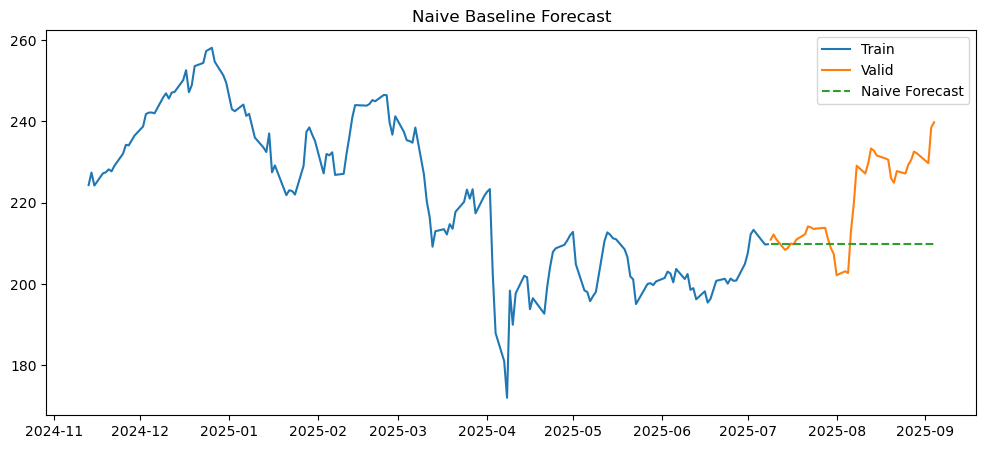

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Valid')
plt.plot(valid['Naive_Pred'], label='Naive Forecast', linestyle='--')
plt.legend()
plt.title("Naive Baseline Forecast")
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(valid['Close'], valid['Naive_Pred'])
mae = mean_absolute_error(valid['Close'], valid['Naive_Pred'])
print(f"RMSE:{rmse: .2f}, MAE:{mae: .2f}")

RMSE: 218.36, MAE: 11.41
